In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px

In [2]:
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.pipeline import Pipeline

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
df = pd.read_table('https://github.com/Nine587403/DataScience2/blob/main/Restaurant_Reviews.tsv?raw=true')

In [7]:
df.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [8]:
df.tail(10)

,Review,Liked
990,The refried beans that came with my meal were ...,0
991,Spend your money and time some place else.,0
992,A lady at the table next to us found a live gr...,0
993,the presentation of the food was awful.,0
994,I can't tell you how disappointed I was.,0
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [9]:
df.sample(10)

,Review,Liked
191,Both of the egg rolls were fantastic.,1
340,the spaghetti is nothing special whatsoever.,0
272,You can't beat that.,1
23,I could care less... The interior is just beau...,1
856,"Went in for happy hour, great list of wines.",1
14,I was disgusted because I was pretty sure that...,0
798,Mediocre food.,0
407,Food was really good and I got full petty fast.,1
125,"Host staff were, for lack of a better word, BI...",0
652,It is PERFECT for a sit-down family meal or ge...,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [11]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



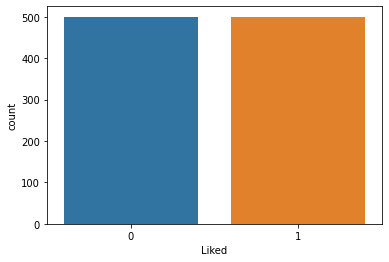

In [12]:
sns.countplot(df.iloc[:,1])

In [13]:
df['len'] = df.iloc[:,0].apply(len)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fabaf7b5828>]],
      dtype=object)

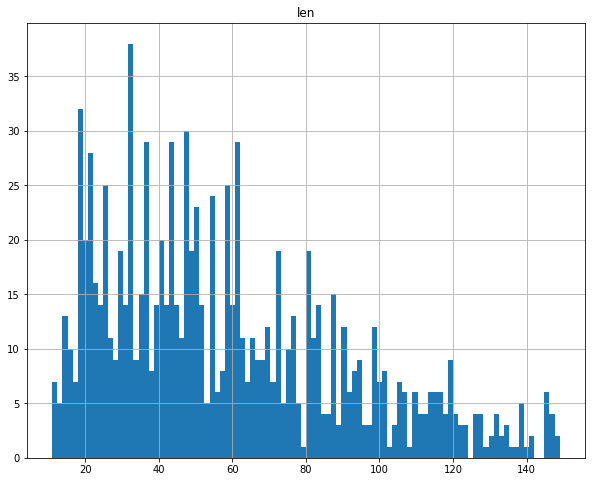

In [14]:
df.hist(column=df.columns[2],bins=100,figsize=(10,8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fabaf7795f8>,
      dtype=object)

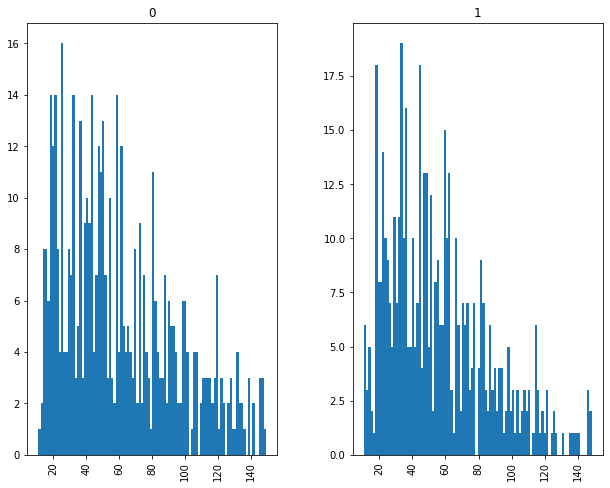

In [15]:
df.hist(column=df.columns[2],by=df.columns[1],bins=100,figsize=(10,8))

In [16]:
df[df.iloc[:,2] == df.iloc[:,2].max()]

,Review,Liked,len
985,The problem I have is that they charge $11.99 ...,0,149


In [17]:
df.groupby(df.columns[1]).mean()

,len
Liked,
0,60.75
1,55.88


In [18]:
for i in range(9):
  print('\n',df[df.iloc[:,1]==0][df.columns[0]].iloc[i])


 Crust is not good.

 Not tasty and the texture was just nasty.

 Now I am getting angry and I want my damn pho.

 Honeslty it didn't taste THAT fresh.)

 The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.

 Would not go back.

 The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.

 I was disgusted because I was pretty sure that was human hair.

 I was shocked because no signs indicate cash only.


In [19]:
for i in range(9):
  print('\n',df[df.iloc[:,1]==1][df.columns[0]].iloc[i])


 Wow... Loved this place.

 Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.

 The selection on the menu was great and so were the prices.

 The fries were great too.

 A great touch.

 Service was very prompt.

 I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!

 Highly recommended.

 The food, amazing.


In [20]:
def text_process(mess):
  no_punc = ''.join([x for x in mess if x not in string.punctuation])
  text = [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]
  return text

In [21]:
df.iloc[:,0].head(5).apply(text_process)

0                                  [Wow, Loved, place]
1                                        [Crust, good]
2                              [tasty, texture, nasty]
3    [Stopped, late, May, bank, holiday, Rick, Stev...
4                     [selection, menu, great, prices]
Name: Review, dtype: object

In [22]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df.iloc[:,0])
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x7fabaf0b01e0>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [23]:
len(bow_transformer.vocabulary_)

2159

In [24]:
bow_df = bow_transformer.transform(df.iloc[:,0])

In [25]:

bow_df

<1000x2159 sparse matrix of type '<class 'numpy.int64'>'
	with 5606 stored elements in Compressed Sparse Row format>

In [26]:
bow_df.nnz

5606

In [27]:
print('% Sparsity ',bow_df.nnz*100/(bow_df.shape[0]*bow_df.shape[1]))


% Sparsity  0.25965724872626217


In [28]:
tfidf_transformer = TfidfTransformer().fit(bow_df)

In [29]:
tfidf_transformer

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [30]:
tfidf_df = tfidf_transformer.transform(bow_df)

In [31]:
tfidf_df

<1000x2159 sparse matrix of type '<class 'numpy.float64'>'
	with 5606 stored elements in Compressed Sparse Row format>

In [32]:
y = df.iloc[:,[1]]

In [33]:
X = tfidf_df

In [34]:
X_train , X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state=100)

In [35]:
nb = MultinomialNB()

In [36]:
nb.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [37]:
y_predict = nb.predict(X_test)

In [38]:
y_predict

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1])

In [39]:
confusion_matrix(y_test,y_predict)

array([[69, 25],
       [23, 83]])

In [40]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'macro'),precision_score(y_test,y_predict,average = 'macro'),recall_score(y_test,y_predict,average = 'macro')

(0.76, 0.7588182092252034, 0.7592592592592593, 0.7585307105580088)

In [41]:
Gnb = GaussianNB()

In [42]:
Gnb.fit(X_train.toarray(),y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
y_predict = Gnb.predict(X_test.toarray())

In [44]:
confusion_matrix(y_test,y_predict)

array([[48, 46],
       [28, 78]])

In [45]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'macro'),precision_score(y_test,y_predict,average = 'macro'),recall_score(y_test,y_predict,average = 'macro')

(0.63, 0.6214833759590792, 0.6303056027164686, 0.623243677238057)

In [46]:
X_train , X_test,y_train,y_test = train_test_split(df.iloc[:,0],df.iloc[:,1],train_size = 0.8,random_state=100)

In [47]:
pl = Pipeline([
               ('bow',CountVectorizer(analyzer=text_process)),
               ('tfidf',TfidfTransformer()),
               ('classifier',MultinomialNB())
])

In [48]:
pl.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fabaf0b01e0>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [49]:
y_predict = pl.predict(X_test)

In [50]:
confusion_matrix(y_test,y_predict)

array([[72, 22],
       [23, 83]])

In [51]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'macro'),precision_score(y_test,y_predict,average = 'macro'),recall_score(y_test,y_predict,average = 'macro')

(0.775, 0.7743173098623336, 0.7741854636591479, 0.7744881573665194)